In [1]:
import numpy as np
import pandas as pd
import uproot
import pyarrow.parquet as pq
import awkward_pandas as akpd
import itertools
import mplhep as hep
hep.style.use([hep.style.ATLAS])
import matplotlib.pyplot as plt
import time

In [2]:
def invariant_mass_ee(row,j,z):
    # Calculate components for the first particle
    ET1 = np.sqrt(row["el_pt"][j]**2 + row["el_m"][j]**2)
    px1 = row["el_pt"][j] * np.cos(row["el_phi"][j])
    py1 = row["el_pt"][j] * np.sin(row["el_phi"][j])
    pz1 = row["el_pt"][j] * np.sinh(row["el_eta"][j])
    E1 = ET1 * np.cosh(row["el_eta"][j])
    
    # Calculate components for the second particle
    ET2 = np.sqrt(row["el_pt"][z]**2 + row["el_m"][z]**2)
    px2 = row["el_pt"][z] * np.cos(row["el_phi"][z])
    py2 = row["el_pt"][z] * np.sin(row["el_phi"][z])
    pz2 = row["el_pt"][z] * np.sinh(row["el_eta"][z])
    E2 = ET2 * np.cosh(row["el_eta"][z])
    # Compute the invariant mass
    M = np.sqrt((E1 + E2)**2 - ((px1 + px2)**2 + (py1 + py2)**2 + (pz1 + pz2)**2))
    
    # invariant_mass = np.sqrt(2*dataset.pt1*dataset.pt2*(np.cosh(dataset.eta1-dataset.eta2) - np.cos(dataset.phi1-dataset.phi2)))
    return M


def Z_peak(row,key):
    Z_mass = 91.1876
    j = None
    z = None
    print("hola")
    x=0
    for i in range(len(row["el_pt"])):
        x = x + row["el_pt"][i]
    
    # for i in range((row["el_truthOrigin"])):
    #     # print(i)
    #     if row["el_truthOrigin"][i] == 13:
    #         print(i)
    #         if j is None:
    #             j = i
    #         elif z is None:
    #             print(i)
    #             z = i
    #             break
    # print("loop finished")
    # if j is not None and z is not None:
    #     return 6#invariant_mass_ee(row,j,z)
    # else:
    #     return None
    result = 6  # Assume this is the complex logic you have
    # Ensure it returns a single value or a fixed-size array that matches the DataFrame's expectations
    return x #np.array(result).reshape(-1) 


In [3]:
if False:
    path = '/groups/hep/kinch/H_Zg/samples_processed/HZeeg_ggF_MC_reduced_28august_131var.parquet'
else:
    path = 'c:/Users/Jens/Documents/Github/Thesis/samples_processed/HZeeg_ggF_MC_reduced_28august_131var.parquet'

sample = pd.read_parquet(path) 
print(sample.shape)

(80000, 131)


In [4]:
headers = sample.columns
print("Headers:")
for header in headers:
    # print(header)
    print(f'{header}, {sample[header].iloc[108]}, {type(sample[header].iloc[108])}')
    # first_index_shape = sample[header].iloc[0].shape if isinstance(sample[header].iloc[0], (pd.Series, np.ndarray)) else None
    #print("Shape of the first index:", first_index_shape)


Headers:
runNumber, 410000, <class 'numpy.uint32'>
eventNumber, 106246, <class 'numpy.uint64'>
mcEventNumber, 106246, <class 'numpy.uint64'>
actualInteractionsPerCrossing, 49.5, <class 'numpy.float32'>
averageInteractionsPerCrossing, 49.5, <class 'numpy.float32'>
mcEventWeights, [31, 31, 19.5, 29.4, 29, 19.8, 32.4, ..., 27.7, 29.9, 31, 31, 31.6, 30.4, -310], <class 'awkward.highlevel.Array'>
truthel_m, [0.511, 0.511], <class 'awkward.highlevel.Array'>
truthel_px, [-52, -108], <class 'awkward.highlevel.Array'>
truthel_py, [6.92, 13.4], <class 'awkward.highlevel.Array'>
truthel_pz, [-26.6, -51.7], <class 'awkward.highlevel.Array'>
truthel_E, [58.8, 120], <class 'awkward.highlevel.Array'>
truthel_pdgId, [11, -11], <class 'awkward.highlevel.Array'>
truthel_ptcone30, [-1, -1], <class 'awkward.highlevel.Array'>
truthel_etcone20, [-1, -1], <class 'awkward.highlevel.Array'>
truthel_ParticleOrigin, [6, 6], <class 'awkward.highlevel.Array'>
truthel_Classification, [132, 132], <class 'awkward.hig

In [5]:
k=108

print(*sample['GSFTrackParticlesAuxDyn_definingParametersCovMatrixDiag'][k])
print(sample["el_truthOrigin"][k])
num_electrons = len(sample["el_truthOrigin"][k])
print(num_electrons)
I = []
J = []
for i, j in itertools.combinations(range(num_electrons), 2):
    I.append(i)
    J.append(j)
print(I)
print(J)

print('what is being pulled out:')
print(sample['truthel_m'][k])
print(sample['GSFTrackParticlesAuxDyn_theta'][k])
print(sample['GSFTrackParticlesAuxDyn_d0'][k])
print(sample['GSFTrackParticlesAuxDyn_z0'][k])

[0.0598, 0.541, 8.12e-05, 9.08e-07, 1.1e-09] [0.0064, 0.0262, 6.08e-06, 1.21e-05, 3.41e-10] [0.0508, 2.5, 2.31e-05, 2.88e-07, 1.72e-10] [0.0167, 0.0178, 1.77e-05, 8.31e-06, 2.07e-09]
[0, 0, 0, 0, 0]
5
[0, 0, 0, 0, 1, 1, 1, 2, 2, 3]
[1, 2, 3, 4, 2, 3, 4, 3, 4, 4]
what is being pulled out:
[0.511, 0.511]
[2.93, 1.43, 0.171, 1.96]
[0.134, 0.177, 2.27, -1.81]
[85.3, 72, -51.3, -12.6]


In [6]:
print(sample['el_truthType'])

0                                                      [0]
1                                                  [4, 17]
2                                             [17, 17, 17]
3                                                  [17, 4]
4                                       [4, 4, 0, 0, 0, 4]
                               ...                        
79995                               [17, 0, 17, 0, 17, 17]
79996       [4, 16, 16, 16, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0]
79997    [0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0,...
79998    [16, 16, 0, 0, 16, 16, 6, 0, 0, 17, 0, 0, 0, 0...
79999    [4, 2, 4, 0, 0, 16, 0, 0, 17, 0, 0, 16, 0, 0, ...
Name: el_truthType, Length: 80000, dtype: awkward


In [10]:
sample_small = sample.head(3000)
print(sample_small.shape)

(3000, 131)


TypeError: 'DataFrame' object is not callable

In [19]:
print(np.pi-np.max(sample_small['el_phi']))
print(np.pi-np.max(sample_small['GSFTrackParticlesAuxDyn_phi']))
print(np.pi+np.min(sample_small['el_phi']))
print(np.pi+np.min(sample_small['GSFTrackParticlesAuxDyn_phi']))

1.6363459177881623e-05
1.6363459177881623e-05
0.0002767165475567879
0.0002767165475567879


In [9]:
list_dR = []
list_best_match = []

for z in range(len(sample_small["el_truthOrigin"])):
    # event z
    num_electrons = len(sample_small["el_truthOrigin"][z])
    dR_min = np.ones(num_electrons)*999
    GSF_index = np.ones(num_electrons)*-1
    
    for i_el in range(num_electrons):
        NGSF = len(sample_small["GSFTrackParticlesAuxDyn_theta"][z])
        for i_GSF in range(NGSF):
            eta_GSF = -np.log(np.tan(sample_small['GSFTrackParticlesAuxDyn_theta'][z][i_GSF]/2))
            deta = sample_small['el_eta'][z][i_el] - eta_GSF
            dphi = sample_small['el_phi'][z][i_el] - sample_small['GSFTrackParticlesAuxDyn_phi'][z][i_GSF]
            if (dphi > np.pi) : dphi = dphi - np.pi
            if (dphi < -np.pi) : dphi = dphi + np.pi
            dR_eG = np.sqrt(deta**2 + dphi**2)
            list_dR.append(dR_eG)
            # if (dR_eG < 0.01) :
            #     print("We got a match!")
            #     print(f"  eta_el = {eta_el:5.3f}  eta_GSF = {eta_GSF:5.3f}")
            #     print(f"  phi_el = {phi_el:5.3f}  phi_GSF = {phi_GSF:5.3f}")
            #     print(f"  dR = {dR_eG:5.3f}")
            if (dR_eG < dR_min[i_el]):
                dR_min[i_el] = dR_eG
                GSF_index[i_el] = i_GSF
    list_best_match.extend(dR_min)
#     print(Nel)
#     print(dR_min)
#     print(dR_index)
# print(list_dR)

In [10]:
print(np.shape(list_best_match))

(21531,)


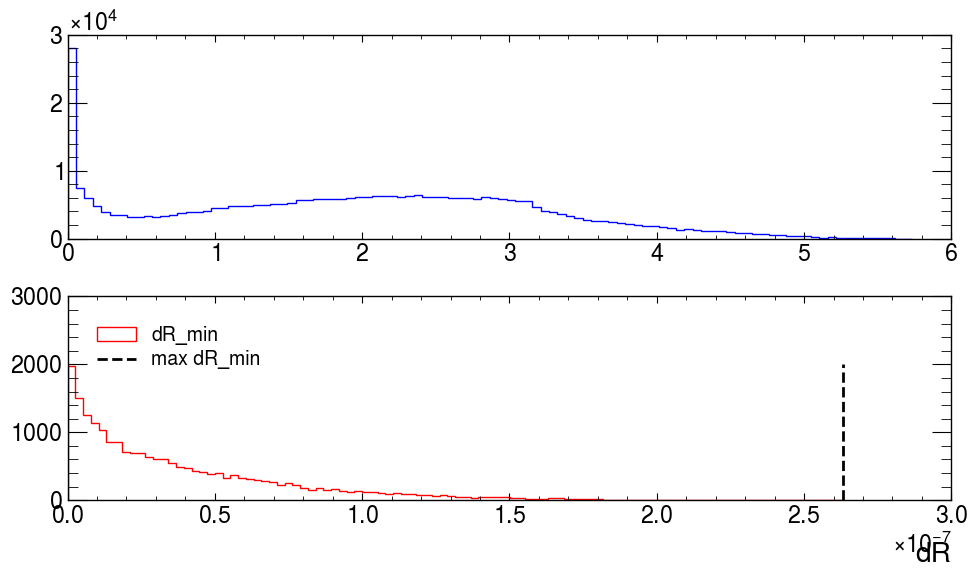

In [11]:
list_dR = np.array(list_dR)
list_best_match = np.array(list_best_match)
fig, ax = plt.subplots(2,1,figsize=(10, 6))
ax[0].hist(list_dR, bins=100, histtype='step', color='b', label='dR')
ax[1].hist(list_best_match.flatten(), bins=100, histtype='step', color='r', label=f'dR_min')
ax[1].plot([np.max(list_best_match), np.max(list_best_match)], [0, 2000], 'k--', label='max dR_min')
ax[1].set_xlabel('dR')
ax[1].legend()
# ax.set_xlim(0, 0.2)
# ax.set_xscale('log')
# ax.set_yscale('log')
fig.tight_layout()

In [12]:
def GSF_Track_finder(row):
    num_electrons = len(row["el_truthOrigin"])
    dR_min = np.ones(num_electrons)*999
    GSF_index = np.ones(num_electrons,dtype=int)*-1
    for i_el in range(num_electrons):
        NGSF = len(row["GSFTrackParticlesAuxDyn_theta"])
        for i_GSF in range(NGSF):
            eta_GSF = -np.log(np.tan(row['GSFTrackParticlesAuxDyn_theta'][i_GSF]/2))
            deta = row['el_eta'][i_el] - eta_GSF
            dphi = row['el_phi'][i_el] - row['GSFTrackParticlesAuxDyn_phi'][i_GSF]
            if (dphi > np.pi) : dphi = dphi - np.pi
            if (dphi < -np.pi) : dphi = dphi + np.pi
            dR_eG = np.sqrt(deta**2 + dphi**2)
            if (dR_eG < dR_min[i_el]):
                dR_min[i_el] = dR_eG
                GSF_index[i_el] = i_GSF
    return GSF_index, dR_min

In [13]:
# Create new dataframe containing all the pair of electrons
# Create an empty list to store the new rows
new_rows = []

# Iterate through each row of the original DataFrame
# for index, row in sample.iterrows():

time2_array = []
start_loop = time.time()
print(f'length of outer loop: {len(sample_small["el_truthOrigin"])}')

for z in range(len(sample_small["el_truthOrigin"])):
    # Get the number of electrons in this event
    num_electrons = len(sample_small["el_truthOrigin"][z])
    
    #first, find the best match between electrons and GSF tracks
    GSF_index, GSF_dR = GSF_Track_finder(sample_small.iloc[z])
    
    # print(z)
    # Generate all possible pairs of electrons
    for i, j in itertools.combinations(range(num_electrons), 2):
        # Create a new row with the combined variables of the two electrons
        
        mass = invariant_mass_ee(sample_small.iloc[z],i,j)/1000.
        

        if sample_small["el_truthOrigin"][z][i] == 13 and sample_small["el_truthOrigin"][z][j] == 13 and sample_small["el_charge"][z][i] != sample_small["el_charge"][z][j]:
            isZ = 1
        else:
            isZ = 0
        # print(i,j)
        new_row = {
            'event_index': z,
            'el_index':[i,j],
            'runNumber': sample_small['runNumber'][z],
            'eventNumber': sample_small['eventNumber'][z],
            'actualInteractionsPerCrossing': sample_small['actualInteractionsPerCrossing'][z],
            'averageInteractionsPerCrossing': sample_small['averageInteractionsPerCrossing'][z],
            'm_ee': mass,
            'isZ':isZ,
            
            'el1_pt':           sample_small['el_pt'][z][i],
            'el1_eta':          sample_small['el_eta'][z][i],
            'el1_phi':          sample_small['el_phi'][z][i],
            'el1_m':            sample_small['el_m'][z][i],
            'el1_charge':       sample_small['el_charge'][z][i],
            'el1_ptvarcone20':  sample_small['el_ptvarcone20'][z][i],
            'el1_topoetcone20': sample_small['el_topoetcone20'][z][i],
            'el1_topoetcone40': sample_small['el_topoetcone40'][z][i],
            'el1_f1':           sample_small['el_f1'][z][i],
            'el1_neflowisol20': sample_small['el_neflowisol20'][z][i],
            'el1_truthPdgId':   sample_small['el_truthPdgId'][z][i],
            'el1_truthType':    sample_small['el_truthType'][z][i],
            'el1_truthOrigin':  sample_small['el_truthOrigin'][z][i],
            'el1_DFCommonElectronsECIDS': sample_small['el_DFCommonElectronsECIDS'][z][i],
            'el1_DFCommonElectronsECIDSResult': sample_small['el_DFCommonElectronsECIDSResult'][z][i],            
            'el1_DFCommonElectrons_pel': sample_small['el_DFCommonElectronsDNN_pel'][z][i],
            'el1_DFcommonElectrons_LHLoose': sample_small['el_DFCommonElectronsLHLoose'][z][i],

            'el1_GSFTrack_d0': sample_small['GSFTrackParticlesAuxDyn_d0'][z][GSF_index[i]],
            'el1_GSFTrack_z0': sample_small['GSFTrackParticlesAuxDyn_z0'][z][GSF_index[i]],
            'el1_GSFTrack_theta': sample_small['GSFTrackParticlesAuxDyn_theta'][z][GSF_index[i]],
            'el1_GSFTrack_phi': sample_small['GSFTrackParticlesAuxDyn_phi'][z][GSF_index[i]],
            'el1_GSFTrack_qOverP': sample_small['GSFTrackParticlesAuxDyn_qOverP'][z][GSF_index[i]],
            'el1_GSF_dR': GSF_dR[i],

            'el1_GSF_Track_Var0': sample_small['GSFTrackParticlesAuxDyn_definingParametersCovMatrixDiag'][z][GSF_index[i]][0],
            'el1_GSF_Track_Var1': sample_small['GSFTrackParticlesAuxDyn_definingParametersCovMatrixDiag'][z][GSF_index[i]][1],
            'el1_GSF_Track_Var2': sample_small['GSFTrackParticlesAuxDyn_definingParametersCovMatrixDiag'][z][GSF_index[i]][2],
            'el1_GSF_Track_Var3': sample_small['GSFTrackParticlesAuxDyn_definingParametersCovMatrixDiag'][z][GSF_index[i]][3],
            'el1_GSF_Track_Var4': sample_small['GSFTrackParticlesAuxDyn_definingParametersCovMatrixDiag'][z][GSF_index[i]][4],            

            'el2_pt':           sample_small['el_pt'][z][j],
            'el2_eta':          sample_small['el_eta'][z][j],
            'el2_phi':          sample_small['el_phi'][z][j],
            'el2_m':            sample_small['el_m'][z][j],
            'el2_charge':       sample_small['el_charge'][z][j],
            'el2_ptvarcone20':  sample_small['el_ptvarcone20'][z][j],
            'el2_topoetcone20': sample_small['el_topoetcone20'][z][j],
            'el2_topoetcone40': sample_small['el_topoetcone40'][z][j],
            'el2_f1':           sample_small['el_f1'][z][j],
            'el2_neflowisol20': sample_small['el_neflowisol20'][z][j],
            'el2_truthPdgId':   sample_small['el_truthPdgId'][z][j],
            'el2_truthType':    sample_small['el_truthType'][z][j],
            'el2_truthOrigin':  sample_small['el_truthOrigin'][z][j],
            'el2_DFCommonElectronsECIDS': sample_small['el_DFCommonElectronsECIDS'][z][j],
            'el2_DFCommonElectronsECIDSResult': sample_small['el_DFCommonElectronsECIDSResult'][z][j],
            'el2_DFCommonElectrons_pel': sample_small['el_DFCommonElectronsDNN_pel'][z][j],
            'el2_DFcommonElectrons_LHLoose': sample_small['el_DFCommonElectronsLHLoose'][z][j],

            'el2_GSFTrack_d0': sample_small['GSFTrackParticlesAuxDyn_d0'][z][GSF_index[j]],
            'el2_GSFTrack_z0': sample_small['GSFTrackParticlesAuxDyn_z0'][z][GSF_index[j]],
            'el2_GSFTrack_theta': sample_small['GSFTrackParticlesAuxDyn_theta'][z][GSF_index[j]],
            'el2_GSFTrack_phi': sample_small['GSFTrackParticlesAuxDyn_phi'][z][GSF_index[j]],
            'el2_GSFTrack_qOverP': sample_small['GSFTrackParticlesAuxDyn_qOverP'][z][GSF_index[j]],
            'el2_GSF_dR': GSF_dR[j],

            'el2_GSF_Track_Var0': sample_small['GSFTrackParticlesAuxDyn_definingParametersCovMatrixDiag'][z][GSF_index[j]][0],
            'el2_GSF_Track_Var1': sample_small['GSFTrackParticlesAuxDyn_definingParametersCovMatrixDiag'][z][GSF_index[j]][1],
            'el2_GSF_Track_Var2': sample_small['GSFTrackParticlesAuxDyn_definingParametersCovMatrixDiag'][z][GSF_index[j]][2],
            'el2_GSF_Track_Var3': sample_small['GSFTrackParticlesAuxDyn_definingParametersCovMatrixDiag'][z][GSF_index[j]][3],
            'el2_GSF_Track_Var4': sample_small['GSFTrackParticlesAuxDyn_definingParametersCovMatrixDiag'][z][GSF_index[j]][4],

            #truth variables:
            # 'el_truth_m': sample_small['truthel_m'][z],
            # 'el_truth_px': sample_small['truthel_px'][z],
            # 'el_truth_py': sample_small['truthel_py'][z],
            # 'el_truth_pz': sample_small['truthel_pz'][z],
            # 'el_truth_E': sample_small['truthel_E'][z],
            # 'el_truth_pdgId': sample_small['truthel_pdgId'][z],
            # 'el_truth_Type:': sample_small['el_truthType'][z],
            # 'el_truth_Origin': sample_small['el_truthOrigin'][z],


            # 'el2_truth_m': sample_small['truthel_m'][z][j],
            # 'el2_truth_px': sample_small['truthel_px'][z][j],
            # 'el2_truth_py': sample_small['truthel_py'][z][j],
            # 'el2_truth_pz': sample_small['truthel_pz'][z][j],
            # 'el2_truth_E': sample_small['truthel_E'][z][j],
            # 'el2_truth_pdgId': sample_small['truthel_pdgId'][z][j],
            # 'el2_truth_Type:': sample_small['el_truthType'][z][j],
            # 'el2_truth_Origin': sample_small['el_truthOrigin'][z][j],

            #wtf, these indexes?
            
            # 'event_GSFTrack_cov' : sample_small['GSFTrackParticlesAuxDyn_definingParametersCovMatrixDiag'][z]
        }
        # Append the new row to the list
        new_rows.append(new_row)
    if z % 200 == 0 and z != 0:
        end_loop = time.time()
        time2_array.append(end_loop - start_loop)
        print(f'z: {z}, {z/len(sample_small["el_truthOrigin"])*100:.2f}%, Time for 200 loops: {end_loop - start_loop:.2f}, total time: {np.sum(time2_array)/60:.2f} min')
        # print(f'Estimated time left: {(np.sum(time2_array)*(1-1/(z/len(sample_small["el_truthOrigin"]))))/60:.2f} min')
        start_loop = time.time()

# Convert the list to a new DataFrame
new_df = pd.DataFrame(new_rows)

# Display the new DataFrame
print(new_df["isZ"].value_counts())

length of outer loop: 3000
z: 200, 6.67%, Time for 200 loops: 126.48, total time: 2.11 min
Estimated time left: 5902.31 min
z: 400, 13.33%, Time for 200 loops: 118.16, total time: 4.08 min
Estimated time left: 5300.40 min
z: 600, 20.00%, Time for 200 loops: 144.48, total time: 6.49 min
Estimated time left: 5188.12 min
z: 800, 26.67%, Time for 200 loops: 66.21, total time: 7.59 min
Estimated time left: 4173.76 min
z: 1000, 33.33%, Time for 200 loops: 123.62, total time: 9.65 min
Estimated time left: 3859.61 min
z: 1200, 40.00%, Time for 200 loops: 132.87, total time: 11.86 min
Estimated time left: 3559.03 min
z: 1400, 46.67%, Time for 200 loops: 79.09, total time: 13.18 min
Estimated time left: 3012.94 min
z: 1600, 53.33%, Time for 200 loops: 71.67, total time: 14.38 min
Estimated time left: 2515.83 min
z: 1800, 60.00%, Time for 200 loops: 166.55, total time: 17.15 min
Estimated time left: 2286.93 min
z: 2000, 66.67%, Time for 200 loops: 173.21, total time: 20.04 min
Estimated time left

In [14]:
new_df.to_parquet('HZeeg_ggF_MC_reduced_Zmodel_eepairs_27August_extendedvariables_small.parquet')#, sep=','